Importing modules

In [1]:
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np

from sklearn.cluster import KMeans # kmeans is hard clustering 
from sklearn.datasets import load_iris

hard clustering : the probability of one data belonging to a cluster can only take the value 0 or 1
soft clustering : the probability of one data belonging to a cluster can only take any value between 0 or 1 (example : 75 %)

Load data

In [2]:
iris = load_iris()

X = iris.data
y = iris.target

# j'affiche les premières lignes des données et les target de chacune des obs
print("Head data \n", X[:5,:])
print("Target \n", y)

Head data 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Target 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Nom des classes iris = Labels

In [3]:
# j'affiche les labels uniques
labels = iris.target_names
print("Labels \n", labels)

# je regarde à quelle numéro de classe correspond chaque Labels
print()

# je créé y (iris.target) avec le nom des targets et non pas le numéro 0,1,2
y_labels = [labels[i] for i in y]
print("Head y_labels \n", y_labels[:10])



Labels 
 ['setosa' 'versicolor' 'virginica']

Head y_labels 
 ['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa']


Variables iris = Features

In [4]:
features = iris.feature_names
print("Features \n", features)

Features 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Nombre de clusters et nombre de variables

In [5]:
nb_clusters = len(labels)
nb_features = len(features)

Data visualisation

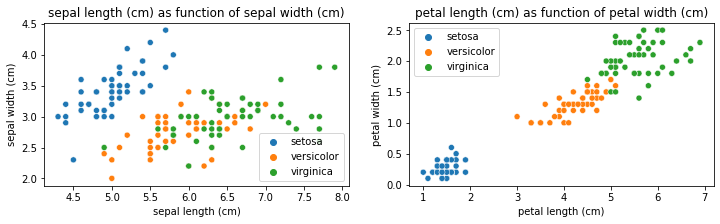

In [6]:
# on créé une figure 

plt.figure(figsize =(12,3)) # longueur, largeur

# je veux tracer la variable 1 (sepal length) en fonction de la variable 2
# # et la variable 3 en fonction de la variable 4
n_plot = 1
for i in range(0, len(features), 2) : 
    # on est obligé de dire qu'on commence à 0 à cause du pas de 2 (le pas doit être le 3ème paramètre de range)
    plt.subplot(1,2,n_plot) 
    # n_plot est obligatoire car nous avons un pas de 2, donc la position va passer de 1 (i+1) à 3 (or nous voulons qu'elle passe de 1 à 2)
    sbn.scatterplot(x = X[:,i], y = X[:,i+1], hue = y_labels) 
    # hue désigne comment les couleurs des données doivent être répartis
    # plt.scatter(X[:,i], X[:,i+1], c = model.predict(X))
    # c'est une autre possibilité de faire ces deux graphiques, mais il faut d'abord implémenter l'algo kmeans
    plt.xlabel(features[i]) 
    plt.ylabel(features[i+1])
    plt.title(f"{features[i]} as function of {features[i+1]}")
    n_plot += 1

plt.show()

Fonction intersection

In [7]:
def intersection(liste1, liste2) : 
    liste3 = [value for value in liste1 if value in liste2]
    return liste3

In [8]:
a = [[1,2,3], [4,5,6], [7,8,9]]
b = [[4,5,6], [7,8,9], [1,2,3]]

# print(intersection(a,b))

a = [[1,2,3], [4,5,6], [7,8,9]]

b = [[10,11,12], [7,8,9], [1,2,3]]

c = []

inter = intersection(a,c)
print(inter)
(inter ==a) or (inter == c)

[]


True

Calcul of all_clusters

In [9]:
# on doit regarder pour chacun des 100 cluster finaux, combien sont différents, ie combien ont au moins une observation différentes
# pour cela, on va comparer les index des observations pour chaque nouveau KMeans créés, avec les anciennes listes de KMeans uniques

N = 100
all_kmeans_index = []
cpt = 1 # le premier kmeans est forcément nouveau
nb_iter = [] # l'algorithme s'arrête avec la convergence

inertia = [] 
cluster_center = []
all_model = []

for i in range(N) : 
    same = False
    model = KMeans(n_clusters = nb_clusters, n_init = 1, max_iter = 300, random_state = i)
        # on ajoute random_state pour que model prenne différents clusters initiaux à chaque KMeans 
    # n_init = 1 car nous voulons être sure d'avoir une initialisation différentes à chaque fois 
    # l'algo kmeans s'arrete également avec la convergence , il ne fait pas forcement les 300 iterations max_iter
    model.fit(X) # on entraine notre modèle (il l'éxecute 300 fois)
    predictions = model.predict(X) # prediction contient la liste final des target (clusters) de chaque observation 

    #  Regrouper chacun des 100 kmeans par classe (ici 3 classes de 100)
    tmp_kmeans_index = []
    for j in range(nb_clusters) : 
        # on ajoute dans une liste pos nos index observations rangés par clusters
        index = np.where(predictions == j)[0].tolist() 
        # np.where renvoie un tuple d'où le [0]
        tmp_kmeans_index.append(index)
    # tmp_kmeans_index contient une liste de 3 petites listes : les index sont séparés selon leur classe , len(tmp_kmeans_index) = 3
    if i == 0 : 
        all_kmeans_index.append(tmp_kmeans_index)
        # le premier kmeans est forcément nouveau 
        # i == 0 : all_kmeans_index = all_kmeans_index[0] 
        # len(all_kmeans_index) = 1 
    else : 
        for k in range(len(all_kmeans_index)) :
            inter = intersection(all_kmeans_index[k], tmp_kmeans_index)
            if ((inter == all_kmeans_index[k]) or (inter == tmp_kmeans_index)) :
                same = True
                break
    nb_iter.append(model.n_iter_)
    # if it's a new one, we add it 
    if (same == False and i !=0) : # on a déjà ajouté le cluster pour i == 0
        all_kmeans_index.append(tmp_kmeans_index)
        cpt = cpt+1
        all_model.append(model)
    
    inertia.append(model.inertia_)
    cluster_center.append(model.cluster_centers_[:,0])

print("Nombre de clusters différents :", len(all_kmeans_index))
print("cpt :", cpt)

Nombre de clusters différents : 3
cpt : 3


In [10]:
print(all_model)

[KMeans(n_clusters=3, n_init=1, random_state=2), KMeans(n_clusters=3, n_init=1, random_state=4)]


nombres d'inertia différentes : 3
inertia 142.7540625 apparait 1
inertia 78.85144142614601 apparait 39
inertia 78.8556658259773 apparait 60


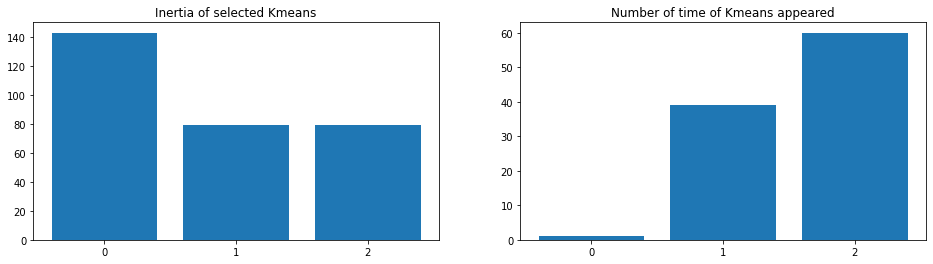

In [11]:
print("nombres d'inertia différentes :", len(np.unique(inertia)))

values_inertia, counts_inertia = np.unique(inertia, return_counts=True)

for i, j in zip(values_inertia[counts_inertia.argsort()], counts_inertia[counts_inertia.argsort()]):
    print(f'inertia {i} apparait {j}')

counts_intertia_list = counts_inertia[counts_inertia.argsort()].tolist()
values_inertia_list = values_inertia[counts_inertia.argsort()].tolist()

plots = [values_inertia_list, counts_intertia_list]
titles = ["Inertia of selected Kmeans", "Number of time of Kmeans appeared"]

plt.figure(figsize=(16,4))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.bar(x=range(len(all_kmeans_index)), height = plots[i])
    plt.xticks(range(len(all_kmeans_index)))
    plt.title(titles[i])

Statistics

Text(0.5, 1.0, 'Number of iterations of all model KMeans')

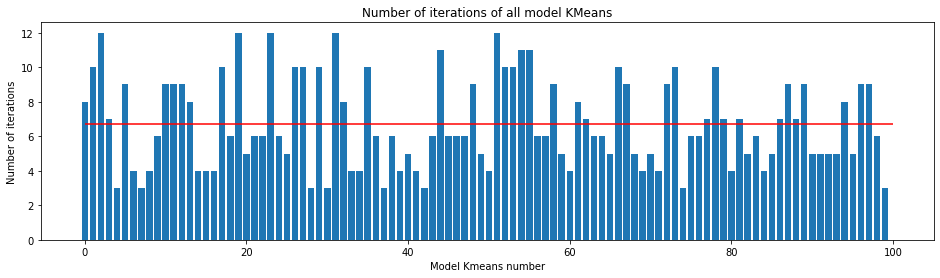

In [12]:
plt.figure(figsize=(16,4))

plt.bar(x = range(N), height = nb_iter) 
plt.hlines(np.mean(nb_iter), xmin = 0, xmax = N, color = 'r', linestyles = "solid")
plt.xlabel("Model Kmeans number")
plt.ylabel("Number of iterations")
plt.title("Number of iterations of all model KMeans")


Cluster visualisation

In [13]:
predictions = []
## pourquoi ? 
print("all model", all_model)
print("\n")
for km in all_model : 
    predictions.append(km.predict(X))
print("predictions", predictions)
print("len(predictions)", len(predictions))
for j in predictions : 
    print(j)

all model [KMeans(n_clusters=3, n_init=1, random_state=2), KMeans(n_clusters=3, n_init=1, random_state=4)]


predictions [array([0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 2, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0,

je veux tracer les deux premières variables du cluster 0

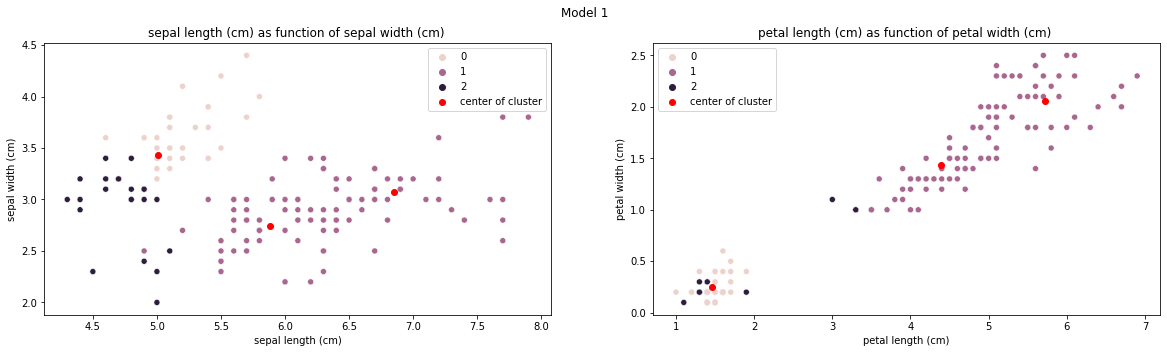

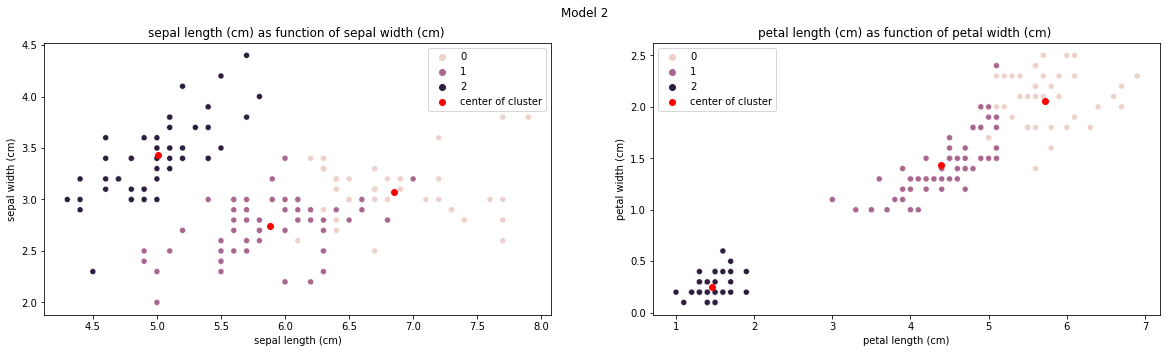

In [14]:
k = 1
for j in predictions : 
    fig = plt.figure(figsize=(20,5))
    n_plot = 1
    for i in range(0, len(features), 2) : 
        plt.subplot(1, 2, n_plot)
        sbn.scatterplot(x = X[:,i], y = X[:, i+1], hue = j)   
        plt.scatter(model.cluster_centers_[:,i], model.cluster_centers_[:, i+1], c = 'red', label = "center of cluster")
        plt.legend() # affiche les label de plt.scatter
        plt.title(f'{features[i]} as function of {features[i+1]} ') # titre de chaque graphique
        plt.xlabel(features[i])
        plt.ylabel(features[i+1])
        n_plot += 1 # pour le subplot
        fig.suptitle(f'Model {k}') # titre de la figure

    k += 1 # pour le suptitles